<a href="https://colab.research.google.com/github/LaXnZ/enhancing-sbmm-in-competitive-games/blob/model-training/Preprocessing_Dataset_%2B_Training_a_Model_Using_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading the dataset
file_path = '/content/drive/MyDrive/Final Year Project - APIIT/Datasets/StarCraft II Replay Analysis.csv'
df = pd.read_csv(file_path)

# getting all the numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# excluding categorical columns
columns_to_exclude = ['GameID', 'LeagueIndex', 'MaxTimeStamp']
numeric_columns_filtered = [col for col in numeric_columns if col not in columns_to_exclude]


print("All Numeric Columns in the Dataset:")
print(numeric_columns)

print("\nFiltered Numeric Columns for PCA (Excluding Irrelevant Ones):")
print(numeric_columns_filtered)

print("\nExcluded Columns:")
print(columns_to_exclude)

All Numeric Columns in the Dataset:
['GameID', 'LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM', 'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks', 'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency', 'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade', 'ComplexAbilityUsed', 'MaxTimeStamp']

Filtered Numeric Columns for PCA (Excluding Irrelevant Ones):
['Age', 'HoursPerWeek', 'TotalHours', 'APM', 'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks', 'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency', 'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade', 'ComplexAbilityUsed']

Excluded Columns:
['GameID', 'LeagueIndex', 'MaxTimeStamp']


In [ ]:
# scaling the selected numeric columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_columns_filtered])

# applying vector normalization to each row in the scaled dataset
normalized_data = scaled_data / np.linalg.norm(scaled_data, axis=1, keepdims=True)

# creating a dataframe for the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=numeric_columns_filtered)

# displaying the normalized dataset
print("Vector Normalized Dataset for PCA:")
print(normalized_df.head())

# saving the normalized dataset
output_path = '/content/drive/MyDrive/Final Year Project - APIIT/Datasets/Vector_Normalized_Dataset_for_PCA.csv'
normalized_df.to_csv(output_path, index=False)
print(f"\nThe vector-normalized dataset has been saved as '{output_path}'.")

# verifying the normalization by checking row norms
row_norms = np.linalg.norm(normalized_data, axis=1)
print("\nNorm of each row (should be 1):")
print(row_norms[:10])  # display norms for only the first 10 rows

# verifying the mean and standard deviation for scaled data before normalization
scaled_df = pd.DataFrame(scaled_data, columns=numeric_columns_filtered)
print("\nMean of scaled data (before normalization):")
print(scaled_df.mean(axis=0))

print("\nStandard Deviation of scaled data (before normalization):")
print(scaled_df.std(axis=0))

# checking column-wise statistics after vector normalization
print("\nMean of data after vector normalization:")
print(normalized_df.mean(axis=0))

print("\nStandard Deviation of data after vector normalization:")
print(normalized_df.std(axis=0))


Vector Normalized Dataset for PCA:
        Age  HoursPerWeek  TotalHours       APM  SelectByHotkeys  \
0  0.397868     -0.154499    0.036826  0.160551        -0.046362   
1  0.129148     -0.198513    0.093717  0.094248        -0.075638   
2  0.622654     -0.154939   -0.013769 -0.284248        -0.189748   
3 -0.228431      0.124041   -0.011743 -0.065982        -0.224211   
4  0.501720     -0.100726   -0.005420  0.022935        -0.122008   

   AssignToHotkeys  UniqueHotkeys  MinimapAttacks  MinimapRightClicks  \
0        -0.213915      -0.031187        0.021759            0.004048   
1        -0.203829       0.109512        0.474148            0.047957   
2        -0.052984      -0.137412        0.369253            0.061530   
3        -0.258886      -0.453777       -0.098461            0.150129   
4        -0.041917      -0.107378       -0.120823            0.508909   

   NumberOfPACs  GapBetweenPACs  ActionLatency  ActionsInPAC  \
0      0.436806       -0.140252      -0.371745     -0

In [ ]:
# Step: Handle missing values before calculating variances
# Fill missing values with the mean for each numeric column
df[numeric_columns_filtered] = df[numeric_columns_filtered].fillna(df[numeric_columns_filtered].mean())

# Reapply scaling after handling missing values
scaled_data = scaler.fit_transform(df[numeric_columns_filtered])

# Recalculate variance for each feature
feature_variances = np.var(scaled_data, axis=0)  # Variance for each column in scaled data

# Create a DataFrame to display feature variances
variance_df = pd.DataFrame({
    'Feature': numeric_columns_filtered,
    'Variance': feature_variances
}).sort_values(by='Variance', ascending=False)

# Display the updated feature variances
print("Updated Feature Variances (After Handling Missing Values):")
print(variance_df)

# Save the updated variance data for review
updated_output_path_variance = '/content/drive/MyDrive/Final Year Project - APIIT/Datasets/Updated_Feature_Variances.csv'
variance_df.to_csv(updated_output_path_variance, index=False)
print(f"\nUpdated feature variances have been saved as '{updated_output_path_variance}'.")


Updated Feature Variances (After Handling Missing Values):
               Feature  Variance
13    TotalMapExplored       1.0
3                  APM       1.0
10      GapBetweenPACs       1.0
0                  Age       1.0
12        ActionsInPAC       1.0
17  ComplexAbilityUsed       1.0
4      SelectByHotkeys       1.0
11       ActionLatency       1.0
2           TotalHours       1.0
1         HoursPerWeek       1.0
14         WorkersMade       1.0
15     UniqueUnitsMade       1.0
5      AssignToHotkeys       1.0
8   MinimapRightClicks       1.0
6        UniqueHotkeys       1.0
7       MinimapAttacks       1.0
16    ComplexUnitsMade       1.0
9         NumberOfPACs       1.0

Updated feature variances have been saved as '/content/drive/MyDrive/Final Year Project - APIIT/Datasets/Updated_Feature_Variances.csv'.


In [ ]:
# Step: Apply PCA to the standardized dataset
# Initialize PCA to create as many components as there are features
pca = PCA(n_components=len(numeric_columns_filtered))
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame for the principal components
pc_columns = [f"PC{i+1}" for i in range(len(numeric_columns_filtered))]
pca_df = pd.DataFrame(principal_components, columns=pc_columns)

# Display the explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_
explained_variance_df = pd.DataFrame({
    'Principal Component': pc_columns,
    'Explained Variance Ratio': explained_variance,
    'Cumulative Variance': explained_variance.cumsum()
})

# Save the PCA results for reference
output_path_pca = '/content/drive/MyDrive/Final Year Project - APIIT/Datasets/PCA_Components.csv'
pca_df.to_csv(output_path_pca, index=False)
print(f"\nPCA components dataset has been saved as '{output_path_pca}'.")

# Save explained variance information
output_path_variance = '/content/drive/MyDrive/Final Year Project - APIIT/Datasets/PCA_Explained_Variance.csv'
explained_variance_df.to_csv(output_path_variance, index=False)
print(f"\nExplained variance information has been saved as '{output_path_variance}'.")

# Display the top components and their explained variance
print("\nExplained Variance by Principal Components:")
print(explained_variance_df.head())

# Provide reasons for creating principal components
reasons = []
for i, var in enumerate(explained_variance, start=1):
    reasons.append(f"PC{i}: Explains {var*100:.2f}% of the variance, combining features to represent key patterns in the data.")

# Print the reasons for each principal component
print("\nReasons for Each Principal Component:")
for reason in reasons:
    print(reason)



PCA components dataset has been saved as '/content/drive/MyDrive/Final Year Project - APIIT/Datasets/PCA_Components.csv'.

Explained variance information has been saved as '/content/drive/MyDrive/Final Year Project - APIIT/Datasets/PCA_Explained_Variance.csv'.

Explained Variance by Principal Components:
  Principal Component  Explained Variance Ratio  Cumulative Variance
0                 PC1                  0.260594             0.260594
1                 PC2                  0.113104             0.373698
2                 PC3                  0.082930             0.456628
3                 PC4                  0.072725             0.529352
4                 PC5                  0.061275             0.590627

Reasons for Each Principal Component:
PC1: Explains 26.06% of the variance, combining features to represent key patterns in the data.
PC2: Explains 11.31% of the variance, combining features to represent key patterns in the data.
PC3: Explains 8.29% of the variance, combining f

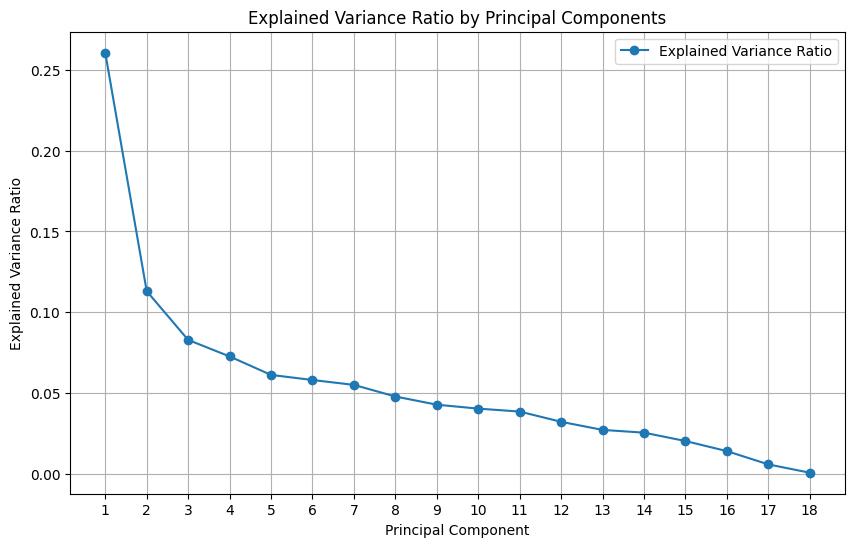

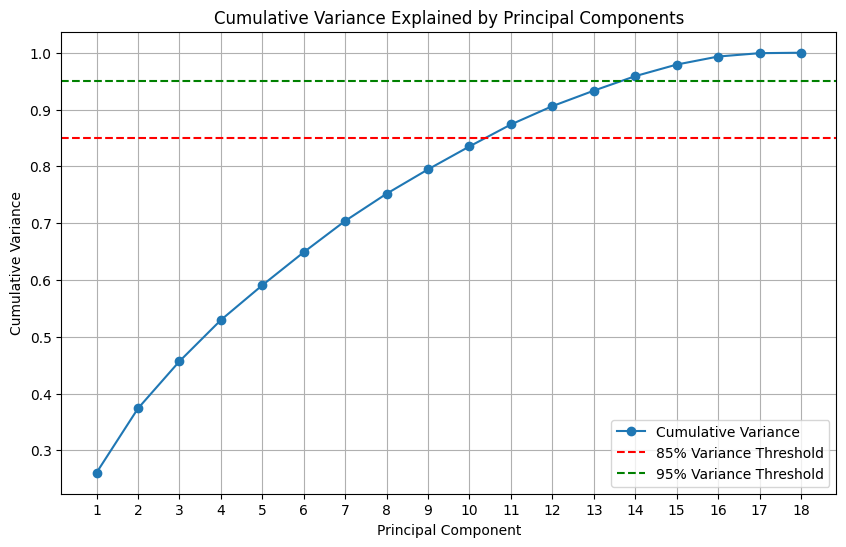

In [ ]:
# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', label='Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.legend()
plt.show()

# Plot cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', label='Cumulative Variance')
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance')
plt.xticks(range(1, len(explained_variance) + 1))
plt.axhline(y=0.85, color='r', linestyle='--', label='85% Variance Threshold')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Variance Threshold')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# Principal Components to Keep Based on Cumulative Variance

# defining the desired variance threshold (e.g., 85%)
desired_variance_threshold = 0.85

# identifying the number of components to retain
components_to_keep = np.argmax(explained_variance.cumsum() >= desired_variance_threshold) + 1

# displaying the number of components to retain
print(f"Number of Principal Components to retain for {desired_variance_threshold*100}% variance: {components_to_keep}")

# creating a reduced dataset with the selected principal components
reduced_pca_df = pca_df.iloc[:, :components_to_keep]

# saving the reduced PCA dataset for further analysis
reduced_output_path = '/content/drive/MyDrive/Final Year Project - APIIT/Datasets/Reduced_PCA_Dataset.csv'
reduced_pca_df.to_csv(reduced_output_path, index=False)
print(f"\nThe reduced PCA dataset with {components_to_keep} components has been saved as '{reduced_output_path}'.")

# displaying the reduced PCA dataset
print("\nReduced PCA Dataset (Top Rows):")
print(reduced_pca_df.head())


Number of Principal Components to retain for 85.0% variance: 11

The reduced PCA dataset with 11 components has been saved as '/content/drive/MyDrive/Final Year Project - APIIT/Datasets/Reduced_PCA_Dataset.csv'.

Reduced PCA Dataset (Top Rows):
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.532523 -0.929846 -1.193731  1.027462 -1.006070 -1.218452  0.804237   
1  1.096446  0.350556 -0.364152  0.087516 -0.965826 -0.797539  0.533616   
2 -1.744232 -0.550658 -0.249190  1.655174 -1.563968  0.330430  0.062600   
3 -0.509858 -1.539906 -0.414985  0.372491  0.909495 -0.871390 -0.012354   
4  0.027317  0.996248  2.530289  2.812868 -0.514440 -0.978692  0.772041   

        PC8       PC9      PC10      PC11  
0 -0.365238  0.982556  0.831429 -0.033046  
1  0.922993 -0.030633 -0.346932 -0.461112  
2  0.961276  0.496861  0.055641 -0.006130  
3 -0.046350  0.167522 -0.992196  0.736336  
4 -0.983991  1.331688  0.324258  1.773887  


Cumulative Variance Explained by the first 11 components: 0.87

PCA Components Matrix (Relationships between PCs and original features):
           Age  HoursPerWeek  TotalHours       APM  SelectByHotkeys  \
PC1  -0.114305      0.129500    0.030533  0.423806         0.319850   
PC2   0.072236     -0.045415    0.009520  0.004422         0.069729   
PC3   0.063219     -0.038756   -0.064680 -0.047057        -0.159832   
PC4   0.311164     -0.072090    0.005814  0.114917         0.091133   
PC5  -0.584494      0.597423    0.193825  0.080258         0.064685   
PC6   0.216710      0.170777    0.329637  0.098141         0.404107   
PC7   0.066239     -0.261813    0.901308 -0.001353        -0.080760   
PC8   0.042355      0.467916    0.126392 -0.213199        -0.240950   
PC9   0.610427      0.495422    0.035283 -0.051845        -0.186190   
PC10  0.247750      0.143387   -0.131289  0.227992         0.374672   
PC11  0.164240      0.161969   -0.014686 -0.010882        -0.012847   

      Assi

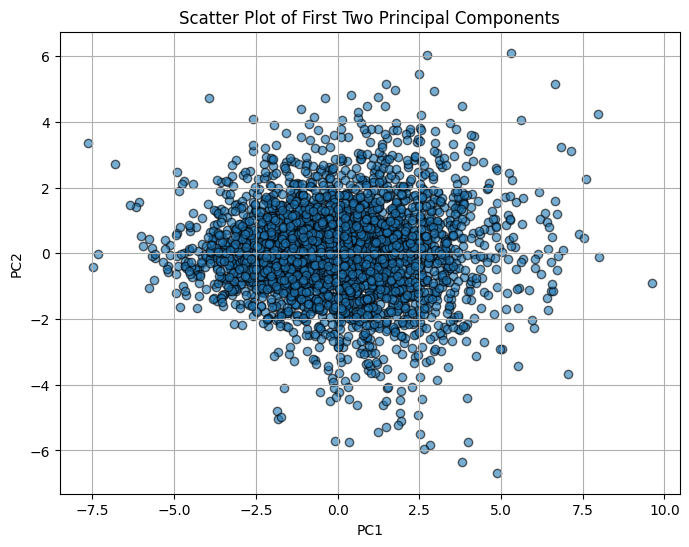

In [ ]:
# 1: checking the cumulative variance explained by the selected components
print(f"Cumulative Variance Explained by the first {components_to_keep} components: {explained_variance.cumsum()[components_to_keep - 1]:.2f}")

# 2: comparing the relationships between original features and principal components
# PCA Components Matrix
pca_components_df = pd.DataFrame(pca.components_[:components_to_keep],
                                 columns=numeric_columns_filtered,
                                 index=[f"PC{i+1}" for i in range(components_to_keep)])
print("\nPCA Components Matrix (Relationships between PCs and original features):")
print(pca_components_df)

# 3: visualizing PCs to check clustering or patterns
# scatter plot for the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(reduced_pca_df["PC1"], reduced_pca_df["PC2"], alpha=0.6, edgecolor='k')
plt.title("Scatter Plot of First Two Principal Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

### Before Preprocessing the Dataset

Non-Preprocessed Confusion Matrix:
[[ 42   0   0   0   0   0   0   0]
 [  0  26  88   0   0   0   0   0]
 [  0   1  53 109   0   0   0   0]
 [  0   0   1 193  55   0   0   0]
 [  0   0   0  18 207  17   1   0]
 [  0   0   0   0   7 173   0   1]
 [  0   0   0   0   0   9   0   0]
 [  0   0   0   0   0  14   0   4]]

Non-Preprocessed Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        42
           2       0.96      0.23      0.37       114
           3       0.37      0.33      0.35       163
           4       0.60      0.78      0.68       249
           5       0.77      0.85      0.81       243
           6       0.81      0.96      0.88       181
           7       0.00      0.00      0.00         9
           8       0.80      0.22      0.35        18

    accuracy                           0.68      1019
   macro avg       0.67      0.54      0.55      1019
weighted avg       0.70      0.68      0.66    

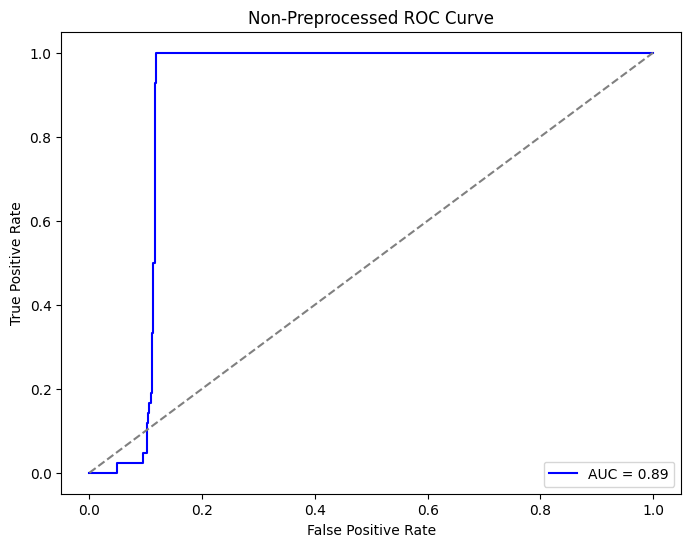

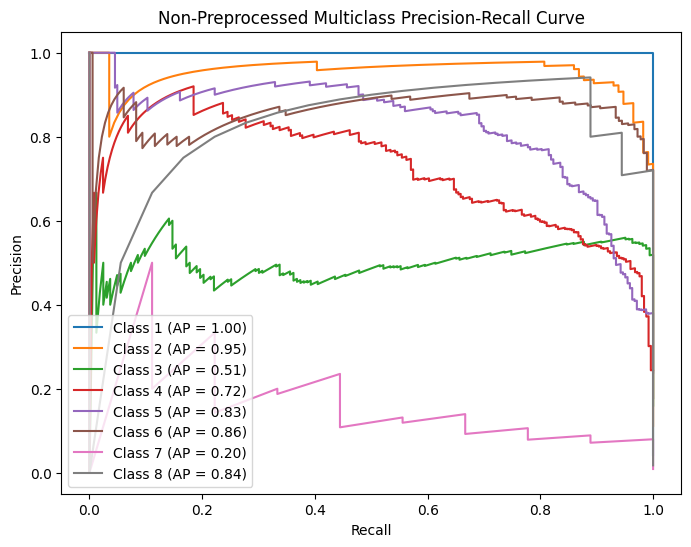


Non-Preprocessed Macro Average Precision: 0.74


In [ ]:
# Before Preprocessed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelBinarizer

# Load the non-preprocessed dataset
df = pd.read_csv('/content/drive/MyDrive/Final Year Project - APIIT/Datasets/StarCraft II Replay Analysis.csv')

# Impute missing values (replace NaN with the column's mean)
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df.drop(columns=['GameID', 'MaxTimeStamp'])))
df_imputed.columns = df.drop(columns=['GameID', 'MaxTimeStamp']).columns  # Retaining original column names

# Assuming 'LeagueIndex' as the target variable
X = df_imputed  # Features
y = df['LeagueIndex']  # Target: 'LeagueIndex'

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)  # Probabilities for each class

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Non-Preprocessed Confusion Matrix:")
print(cm)

# Classification Report
print("\nNon-Preprocessed Classification Report:")
print(classification_report(y_test, y_pred))

# AUC/ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
print(f"\nNon-Preprocessed AUC: {roc_auc:.2f}")

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Non-Preprocessed ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Multiclass Precision-Recall Curve and Average Precision
# Calculate Precision-Recall curve for each class
lb = LabelBinarizer()
y_bin = lb.fit_transform(y_test)

# Plot Precision-Recall for each class
plt.figure(figsize=(8, 6))
for i in range(len(lb.classes_)):
    precision, recall, _ = precision_recall_curve(y_bin[:, i], y_prob[:, i])
    average_precision = average_precision_score(y_bin[:, i], y_prob[:, i])
    plt.plot(recall, precision, label=f'Class {lb.classes_[i]} (AP = {average_precision:.2f})')

plt.title('Non-Preprocessed Multiclass Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()

# Average Precision Score (Macro)
average_precision_macro = average_precision_score(y_bin, y_prob, average='macro')
print(f"\nNon-Preprocessed Macro Average Precision: {average_precision_macro:.2f}")


### After Preprocessing the Dataset

Training dataset saved to /content/drive/MyDrive/Final Year Project - APIIT/Datasets/training_data.csv
Validation dataset saved to /content/drive/MyDrive/Final Year Project - APIIT/Datasets/validation_data.csv
Testing dataset saved to /content/drive/MyDrive/Final Year Project - APIIT/Datasets/testing_data.csv
Model saved to /content/drive/MyDrive/Final Year Project - APIIT/Models/logistic_regression_model.pkl
Confusion Matrix:
[[56  8]
 [14 72]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        64
           1       0.90      0.84      0.87        86

    accuracy                           0.85       150
   macro avg       0.85      0.86      0.85       150
weighted avg       0.86      0.85      0.85       150


AUC: 0.90


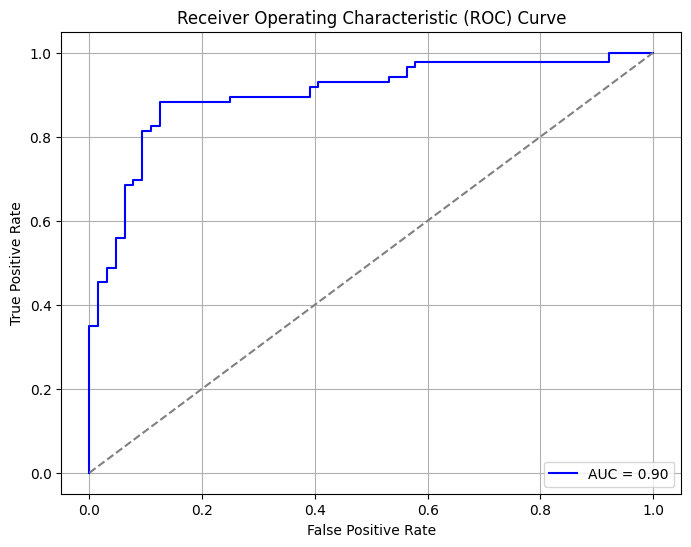


Average Precision: 0.93


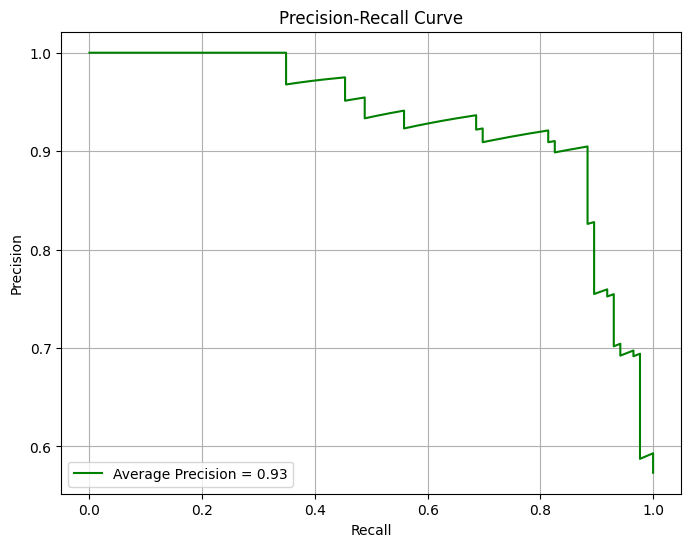

In [ ]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import precision_recall_curve, average_precision_score

# Create a sample classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Step 1: Split into 70% training and 30% temporary (for further split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Split the 30% temporary into 15% validation and 15% testing
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Save training dataset
train_data = pd.DataFrame(X_train, columns=[f'Feature_{i}' for i in range(X_train.shape[1])])
train_data['Target'] = y_train
train_data_save_path = '/content/drive/MyDrive/Final Year Project - APIIT/Datasets/training_data.csv'
train_data.to_csv(train_data_save_path, index=False)
print(f"Training dataset saved to {train_data_save_path}")

# Save validation dataset
val_data = pd.DataFrame(X_val, columns=[f'Feature_{i}' for i in range(X_val.shape[1])])
val_data['Target'] = y_val
val_data_save_path = '/content/drive/MyDrive/Final Year Project - APIIT/Datasets/validation_data.csv'
val_data.to_csv(val_data_save_path, index=False)
print(f"Validation dataset saved to {val_data_save_path}")

# Save testing dataset
test_data = pd.DataFrame(X_test, columns=[f'Feature_{i}' for i in range(X_test.shape[1])])
test_data['Target'] = y_test
test_data_save_path = '/content/drive/MyDrive/Final Year Project - APIIT/Datasets/testing_data.csv'
test_data.to_csv(test_data_save_path, index=False)
print(f"Testing dataset saved to {test_data_save_path}")

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Save the trained model to a file
model_save_path = '/content/drive/MyDrive/Final Year Project - APIIT/Models/logistic_regression_model.pkl'
joblib.dump(model, model_save_path)
print(f"Model saved to {model_save_path}")

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# AUC/ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print(f"\nAUC: {roc_auc:.2f}")

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)
print(f"\nAverage Precision: {average_precision:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='g', label=f'Average Precision = {average_precision:.2f}')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

### Comparison Between Models Trained on Non-Preprocessed and Preprocessed Datasets

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelBinarizer
from sklearn.datasets import make_classification
from sklearn.multiclass import OneVsRestClassifier

# Helper function to collect metrics
def evaluate_model(y_test, y_pred, y_prob, num_classes):
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Classification Report
    class_report = classification_report(y_test, y_pred, output_dict=True)

    # AUC/ROC Curve (One-vs-Rest for multiclass or simple for binary)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    if num_classes > 2:  # Multiclass case (One-vs-Rest)
        for i in range(num_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
    else:  # Binary case
        fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])  # Use the probabilities for the positive class (class 1)
        roc_auc = auc(fpr, tpr)

    # Average Precision (One-vs-Rest for multiclass or simple for binary)
    lb = LabelBinarizer()
    y_bin = lb.fit_transform(y_test)

    precision = dict()
    recall = dict()
    average_precision = dict()

    if num_classes > 2:  # Multiclass case (One-vs-Rest)
        for i in range(num_classes):
            precision[i], recall[i], _ = precision_recall_curve(y_bin[:, i], y_prob[:, i])
            average_precision[i] = average_precision_score(y_bin[:, i], y_prob[:, i])
    else:  # Binary case
        precision, recall, _ = precision_recall_curve(y_test, y_prob[:, 1])  # Use the probabilities for the positive class (class 1)
        average_precision = average_precision_score(y_test, y_prob[:, 1])

    # Calculate macro and weighted average precision scores
    if num_classes > 2:
        macro_avg_prec = average_precision_score(y_bin, y_prob, average='macro')
        weighted_avg_prec = average_precision_score(y_bin, y_prob, average='weighted')
    else:
        macro_avg_prec = average_precision
        weighted_avg_prec = average_precision

    return cm, class_report, roc_auc, precision, recall, average_precision, macro_avg_prec, weighted_avg_prec

# Load and preprocess the non-preprocessed dataset
df = pd.read_csv('/content/drive/MyDrive/Final Year Project - APIIT/Datasets/StarCraft II Replay Analysis.csv')

# Impute missing values (replace NaN with the column's mean)
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df.drop(columns=['GameID', 'MaxTimeStamp'])))
df_imputed.columns = df.drop(columns=['GameID', 'MaxTimeStamp']).columns  # Retaining original column names

# Assuming 'LeagueIndex' as the target variable
X = df_imputed  # Features
y = df['LeagueIndex']  # Target: 'LeagueIndex'

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model for non-preprocessed dataset using OneVsRestClassifier
model_non_pre = OneVsRestClassifier(LogisticRegression(max_iter=1000, solver='liblinear'))
model_non_pre.fit(X_train, y_train)
y_pred_non = model_non_pre.predict(X_test)
y_prob_non = model_non_pre.predict_proba(X_test)  # Probabilities for each class

# Evaluate the non-preprocessed model
num_classes = len(np.unique(y_test))
cm_non, report_non, roc_auc_non, precision_non, recall_non, avg_prec_non, macro_prec_non, weighted_prec_non = evaluate_model(y_test, y_pred_non, y_prob_non, num_classes)

# Load and preprocess a simple synthetic dataset for preprocessed model comparison
X_pre, y_pre = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train_pre, X_test_pre, y_train_pre, y_test_pre = train_test_split(X_pre, y_pre, test_size=0.3, random_state=42)

# Train a logistic regression model for the preprocessed dataset
model_pre = OneVsRestClassifier(LogisticRegression(max_iter=1000))
model_pre.fit(X_train_pre, y_train_pre)
y_pred_pre = model_pre.predict(X_test_pre)
y_prob_pre = model_pre.predict_proba(X_test_pre)  # Probabilities for ROC curve

# Flatten y_test_pre to 1D (fixing the one-hot encoded issue)
y_test_pre_flat = y_test_pre.flatten()  # Flattening to 1D

# Evaluate the preprocessed model
cm_pre, report_pre, roc_auc_pre, precision_pre, recall_pre, avg_prec_pre, macro_prec_pre, weighted_prec_pre = evaluate_model(y_test_pre_flat, y_pred_pre, y_prob_pre, 2)

# Create a DataFrame for comparison of key metrics
metrics_comparison = pd.DataFrame({
    'Metric': ['AUC', 'Average Precision', 'Accuracy', 'Macro Precision', 'Macro Recall', 'Macro F1-Score', 'Weighted Precision', 'Weighted Recall', 'Weighted F1-Score'],
    'Non-Preprocessed': [
        np.mean(list(roc_auc_non.values())),
        avg_prec_non,
        report_non['accuracy'],
        macro_prec_non,
        report_non['macro avg']['recall'],
        report_non['macro avg']['f1-score'],
        weighted_prec_non,
        report_non['weighted avg']['recall'],
        report_non['weighted avg']['f1-score']
    ],
    'Preprocessed': [
        roc_auc_pre,
        avg_prec_pre,
        report_pre['accuracy'],
        macro_prec_pre,
        report_pre['macro avg']['recall'],
        report_pre['macro avg']['f1-score'],
        weighted_prec_pre,
        report_pre['weighted avg']['recall'],
        report_pre['weighted avg']['f1-score']
    ]
})

# Display the metrics comparison table
import IPython.display as display
display.display(metrics_comparison)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


,Metric,Non-Preprocessed,Preprocessed
0,AUC,NaN,0.914171
1,Average Precision,"{0: 1.0, 1: 0.971817272441246, 2: 0.5263075919...",0.927529
2,Accuracy,0.697743,0.850000
3,Macro Precision,0.742851,0.927529
4,Macro Recall,0.563051,0.850834
5,Macro F1-Score,0.579474,0.849998
6,Weighted Precision,0.776218,0.927529
7,Weighted Recall,0.697743,0.850000
8,Weighted F1-Score,0.678066,0.850015
